In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data=pd.read_csv('reltrain.csv')
data.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2010-01-04,RELIANCE,1091.1,1091.1,1021.85,1075.50,17520006
1,2010-01-05,RELIANCE,1149.9,1149.9,1065.40,1070.70,4890040
2,2010-01-06,RELIANCE,1079.9,1094.5,1070.65,1088.00,5415538
3,2010-01-07,RELIANCE,1088.0,1115.0,1078.00,1106.05,5988404
4,2010-01-08,RELIANCE,1108.0,1113.8,1096.00,1103.15,3453926


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1990 non-null   object 
 1   Symbol  1990 non-null   object 
 2   Open    1990 non-null   float64
 3   High    1990 non-null   float64
 4   Low     1990 non-null   float64
 5   Close   1990 non-null   float64
 6   Volume  1990 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 109.0+ KB


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1990 non-null   object 
 1   Symbol  1990 non-null   object 
 2   Open    1990 non-null   float64
 3   High    1990 non-null   float64
 4   Low     1990 non-null   float64
 5   Close   1990 non-null   float64
 6   Volume  1990 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 109.0+ KB


In [6]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(1990, 1)

In [7]:
X_train=[]
y_train=[]

for i in range(60,1149):
    X_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])
    
X_train,y_train=np.array(X_train),np.array(y_train)
    

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1089, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")


In [10]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 11s - loss: 0.0081 - 11s/epoch - 316ms/step
Epoch 2/20
35/35 - 5s - loss: 0.0024 - 5s/epoch - 131ms/step
Epoch 3/20
35/35 - 4s - loss: 0.0023 - 4s/epoch - 127ms/step
Epoch 4/20
35/35 - 4s - loss: 0.0020 - 4s/epoch - 128ms/step
Epoch 5/20
35/35 - 5s - loss: 0.0017 - 5s/epoch - 130ms/step
Epoch 6/20
35/35 - 4s - loss: 0.0019 - 4s/epoch - 128ms/step
Epoch 7/20
35/35 - 5s - loss: 0.0016 - 5s/epoch - 132ms/step
Epoch 8/20
35/35 - 4s - loss: 0.0016 - 4s/epoch - 128ms/step
Epoch 9/20
35/35 - 4s - loss: 0.0015 - 4s/epoch - 124ms/step
Epoch 10/20
35/35 - 4s - loss: 0.0012 - 4s/epoch - 124ms/step
Epoch 11/20
35/35 - 4s - loss: 0.0014 - 4s/epoch - 122ms/step
Epoch 12/20
35/35 - 4s - loss: 0.0012 - 4s/epoch - 125ms/step
Epoch 13/20
35/35 - 4s - loss: 0.0012 - 4s/epoch - 120ms/step
Epoch 14/20
35/35 - 4s - loss: 0.0011 - 4s/epoch - 121ms/step
Epoch 15/20
35/35 - 4s - loss: 0.0011 - 4s/epoch - 118ms/step
Epoch 16/20
35/35 - 4s - loss: 0.0012 - 4s/epoch - 125ms/step
Epoch 17/20
35/

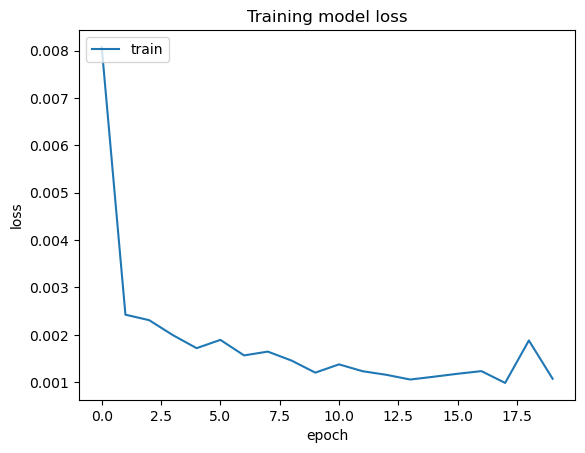

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [12]:
testData = pd.read_csv('adanitest.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData=testData.iloc[:,4:5]
y_test=testData.iloc[60:,0:].values

inputClosing=testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
X_test=[]
length=len(testData)
timestep=60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test=np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(1179, 60, 1)

In [13]:
y_pred=model.predict(X_test)
y_pred

37/37 [==============================] - 2s 31ms/step


array([[-0.49093893],
       [-0.49134472],
       [-0.4917964 ],
       ...,
       [ 1.9322208 ],
       [ 1.9225173 ],
       [ 1.9267974 ]], dtype=float32)

In [14]:
predicted_price=sc.inverse_transform(y_pred)

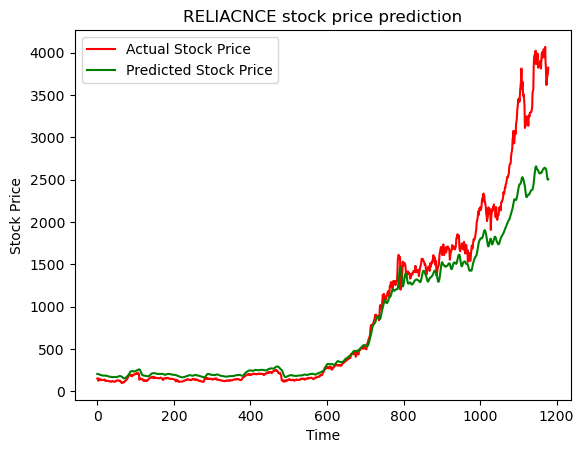

In [17]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('RELIACNCE stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()